# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV
import scipy.stats
from IPython.display import Image

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in the age distribution of male and female riders**
$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [6]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [7]:
#dropping some data I no longer need
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'], axis=1, inplace=True)
df.head()

,ageM,ageF
0,NaN,55.0
1,52.0,NaN
2,41.0,NaN
3,46.0,NaN
4,38.0,NaN


In [8]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,ageM,ageF
count,227764.000000,52093.000000
mean,40.305272,38.951145
std,11.595240,11.405112
min,16.000000,17.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,116.000000,89.000000


In [9]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

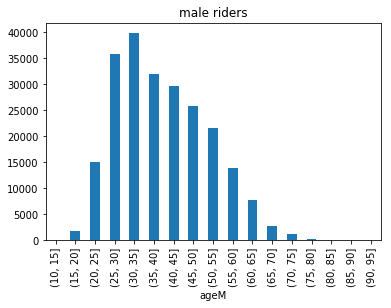

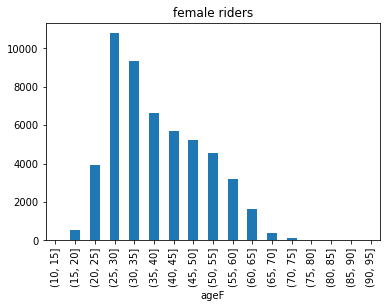

In [10]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")

axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders");


**Figure 1: histogrammed distribution of riders' ages by gender **

Here are the figures about the distributions of the number of different age who use citi bike. The first one is about the male user and the second one is about the female user. We can viaualize the different age distributions of male and female, then we can intuitional know if there is different between them. From those two figures, we can know that the total number of female in any age is lower than male. And males in age 30~35 are more likely to use citi bike than other age. Females in age 25~30 are more likely to use citi bike than other age.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001657
(20, 25]       0.010955
(25, 30]       0.060955
(30, 35]       0.065548
(35, 40]       0.052146
(40, 45]       0.031750
(45, 50]       0.018657
(50, 55]       0.011015
(55, 60]       0.010957
(60, 65]       0.008149
(65, 70]       0.003203
(70, 75]       0.000663
(75, 80]       0.000188
(80, 85]       0.000002
(85, 90]       0.000075
(90, 95]       0.000000


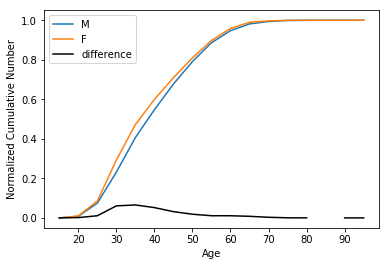

In [11]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 2: the cumulative distribution of CitiBike riders' ages by gender** 

Here is the cumulative distribution of CitiBike riders's ages by gender. From here we can intuitional know the distribution different between male and female. From this figure, we can see that the curve of male and female are similar, but there are still nearly 10% different from age 25 to age 40 

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

## Null Hypothesis of KS tests: There is no difference between the age distribution between male and female rider.  
## significance level is 0.05

KS test is a two-sided test to see if 2 samples are drawn from the same distribution. The first return is K-S statistic and the second return is the two-sided p-value.


In [12]:
alpha = 0.05

In [13]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)

**  FILL IN THE CELL BELOW!**

In [14]:
## your words here!...
## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function
def report_ks_result(ks,a):
    print ('is the ks test p-value ' + 
           '{0:.2f} smaller than the number in critical level {1:.2f}?'.format(ks,a))
    if ks < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if ks < a  else 'not rejected') )

In [15]:
print (ks)
print ('The KS test statistic is '+ str(ks[0]))
report_ks_result(ks[1], alpha)

Ks_2sampResult(statistic=0.067442557802207204, pvalue=4.0408611999082294e-168)
The KS test statistic is 0.0674425578022
is the ks test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that there is difference between the age distribution between male and female rider

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [16]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
#Image(filename="../plotsforclasses/ks2sample_table.png")

In [17]:
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy ks test returned and what it means in terms of NULL HYPOTHESIS
np.random.seed(1114)
reducted = df.sample(frac=0.005, random_state=1)
ks = scipy.stats.ks_2samp(reducted.ageM, reducted.ageF)

In [18]:
print(ks)
print ('The KS test statistic is '+ str(ks[0]))
report_ks_result(ks[1], alpha)

Ks_2sampResult(statistic=0.57843137254901955, pvalue=7.4099761270558517e-210)
The KS test statistic is 0.578431372549
is the ks test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that there is difference between the age distribution between male and female rider

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



## Null Hypothesis of Pearson's test: The famale rider in each age group is uncorrelated with the male rider in each group.
## significance level is 0.05

scipy.stats.pearsonr will return: Pearson’s correlation coefficient and 2-tailed p-value

In [19]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
np.random.seed(11)
reductedM = np.sort(np.random.choice(df.ageM, size=min(len(df.ageM), len(df.ageF))))
np.random.seed(14)
reductedF = np.sort(np.random.choice(df.ageF, size=min(len(df.ageM), len(df.ageF))))

In [20]:
pearson = scipy.stats.pearsonr(reductedM, reductedF)
alpha = 0.05

In [21]:
def report_pearson_result(pearson,a):
    print ('is the pearson test p-value ' + 
           '{0:.2f} smaller than the number in critical level {1:.2f}?'.format(pearson,a))
    if pearson < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if pearson < a  else 'not rejected') )

In [22]:
print(pearson)
print ('The Pearson correlation coefficient is '+ str(pearson[0]))
report_pearson_result(pearson[1], alpha)

(0.99540785196529813, 0.0)
The Pearson correlation coefficient is 0.995407851965
is the pearson test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that the famale rider in each age group is correlated with the male rider in each group.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

## Null Hypothesis of Spearman's test: The male and female rider in each group are uncorrelated.
## significance level is 0.05

scipy.stats.spearmanr will return spearman correlation matrix or correlation coefficient and two-sided p-value.

In [23]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis
spearman = scipy.stats.spearmanr(reductedM,reductedF)

In [24]:
def report_spearman_result(spearman,a):
    print ('is the spearman test p-value ' + 
           '{0:.2f} smaller than the number in critical level {1:.2f}?'.format(spearman,a))
    if spearman < a:
        print ("YES!")
    else: 
        print ("NO!")
    
    print ('the Null hypothesis is {}'.format(\
                            'rejected' if spearman < a  else 'not rejected') )

In [25]:
print(spearman)
print ('The Spearman correlation coefficient is '+ str(spearman[0]))
report_pearson_result(spearman[1], alpha)

SpearmanrResult(correlation=0.99913457153698249, pvalue=0.0)
The Spearman correlation coefficient is 0.999134571537
is the pearson test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that the male and female rider in each group are correlated.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**
I already do that befor doing the test

# Trip duration of bikers that ride during the day vs night

In [26]:
datestring1 = '201511'
getCitiBikeCSV(datestring1)
datestring2 = '201605'
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [27]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')

In [28]:
df = pd.concat([df1, df2])

In [29]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1110,11/1/2015 00:00:00,11/1/2015 00:18:31,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,22545,Subscriber,1981.0,2,2015-11-01 00:00:00
1,1094,11/1/2015 00:00:01,11/1/2015 00:18:15,537,Lexington Ave & E 24 St,40.740259,-73.984092,531,Forsyth St & Broome St,40.718939,-73.992663,23959,Subscriber,1980.0,1,2015-11-01 00:00:01
2,520,11/1/2015 00:00:05,11/1/2015 00:08:45,536,1 Ave & E 30 St,40.741444,-73.975361,498,Broadway & W 32 St,40.748549,-73.988084,22251,Subscriber,1988.0,1,2015-11-01 00:00:05
3,753,11/1/2015 00:00:15,11/1/2015 00:12:48,229,Great Jones St,40.727434,-73.993790,328,Watts St & Greenwich St,40.724055,-74.009660,15869,Subscriber,1981.0,1,2015-11-01 00:00:15
4,353,11/1/2015 00:00:22,11/1/2015 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,151,Cleveland Pl & Spring St,40.722104,-73.997249,21645,Subscriber,1987.0,1,2015-11-01 00:00:22


In [30]:
df_raw = df # save the raw data

In [31]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# SPLIT BY CATEGORY

I am splitting data by day/night and looking at trip duration of riders:

**H0: there is no statistical difference in the trip duration distribution of day and night riders**
$$ \alpha = 0.05 $$

day: 7am-7pm


night: 7pm-7am

In [32]:
df.index = range(len(df))
df['trip_Day'] = df.tripduration[(df.date.dt.hour <= 19) & (df.date.dt.hour > 7)]
df['trip_Night'] = df.tripduration[(df.date.dt.hour > 19) | (df.date.dt.hour <= 7)]

In [33]:
#dropping some data I no longer need
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'], axis=1, inplace=True)
df.head()

,trip_Day,trip_Night
0,NaN,1110.0
1,NaN,1094.0
2,NaN,520.0
3,NaN,753.0
4,NaN,353.0


In [34]:
df['trip_Day'].dropna(inplace= True)
df['trip_Night'].dropna(inplace= True)

In [35]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,trip_Day,trip_Night
count,1.756524e+06,4.430010e+05
mean,1.044031e+03,9.067641e+02
std,7.165954e+03,6.298897e+03
min,6.100000e+01,6.100000e+01
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,2.224026e+06,1.666103e+06


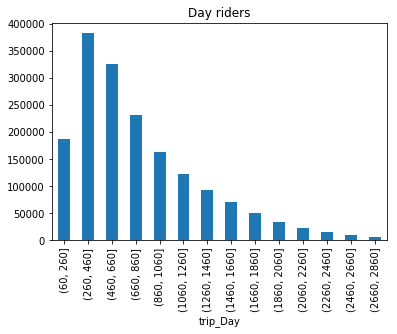

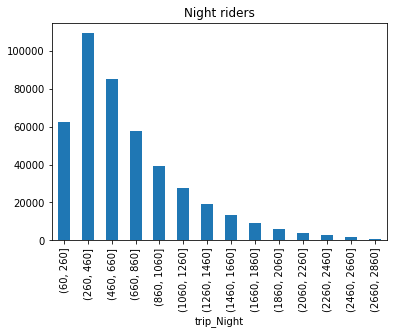

In [36]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3000, 200)
axDay = df.trip_Day.groupby(pd.cut(df.trip_Day, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axDay.set_title("Day riders")

axNight = df.trip_Night.groupby(pd.cut(df.trip_Night, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axNight.set_title("Night riders");


**Figure 3: histogrammed distribution of riders' tripduration by day/night **

Here are the figures about the distributions of riders' tripduration by day/night. The first one is about day time user and the second one is about the night time user. We can viaualize the different trip duration distributions of day time and night, then we can intuitional know if there is different between them. From those two figures, we can know that the total number of day time users is similar with night user.

              count_nonzero
trip_Day                   
(60, 260]          0.032896
(260, 460]         0.059659
(460, 660]         0.064548
(660, 860]         0.061788
(860, 1060]        0.055592
(1060, 1260]       0.046975
(1260, 1460]       0.036659
(1460, 1660]       0.025945
(1660, 1860]       0.018155
(1860, 2060]       0.012193
(2060, 2260]       0.007706
(2260, 2460]       0.004546
(2460, 2660]       0.001997
(2660, 2860]       0.000000


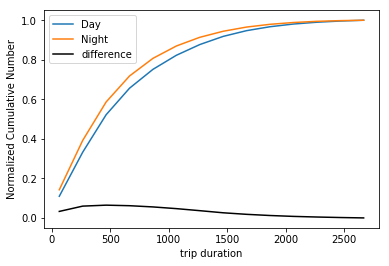

In [37]:
csDay=df.trip_Day.groupby(pd.cut(df.trip_Day, bins)).agg([count_nonzero]).cumsum()

csNight=df.trip_Night.groupby(pd.cut(df.trip_Night, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDay / csDay.max()-csNight / csNight.max()))

pl.plot(bins[:-1] + 5, csDay / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 5, csNight / csNight.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csNight / csNight.max() - csDay / csDay.max())**2, 'k-',
        label = "difference")
pl.xlabel("trip duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 4: the cumulative distribution of CitiBike riders' trip duration by day/night** 

Here is the cumulative distribution of CitiBike riders's trip duration by day/night. From here we can intuitional know the distribution different between day time user and night. From this figure, we can see that the curve of day time user and night user are similar, and there are nearly 5% different from trip duration 500 to 1000 

# KS tests to compare 2 samples

## NNull Hypothesis of KS tests: There is no difference between the trip duration distribution between day time and night rider.
## significance level is 0.05

KS test is a two-sided test to see if 2 samples are drawn from the same distribution. The first return is K-S statistic and the second return is the two-sided p-value.

In [38]:
alpha = 0.05

In [39]:
ks = scipy.stats.ks_2samp(df.trip_Day, df.trip_Night)

In [40]:
print(ks)
print ('The KS test statistic is '+ str(ks[0]))
report_ks_result(ks[1], alpha)

Ks_2sampResult(statistic=0.071033521057252802, pvalue=0.0)
The KS test statistic is 0.0710335210573
is the ks test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that there is difference between the trip duration distribution between day time and night rider.

In [41]:
# for the reducted dataset
np.random.seed(1114)
reducted = df.sample(frac=0.005, random_state=1)
ks = scipy.stats.ks_2samp(reducted.trip_Day, reducted.trip_Night)
alpha = 0.05

In [42]:
print(ks)
print ('The KS test statistic is '+ str(ks[0]))
report_ks_result(ks[1], alpha)

Ks_2sampResult(statistic=0.59738134206219318, pvalue=0.0)
The KS test statistic is 0.597381342062
is the ks test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that there is difference between the trip duration distribution between day time and night rider.

# Pearson's  test for correlation
## Null Hypothesis of Pearson's test: The day time rider in each trip duration group is uncorrelated with the night rider in each group.
## significance level is 0.05

scipy.stats.pearsonr will return: Pearson’s correlation coefficient and 2-tailed p-value

In [43]:
np.random.seed(11)
reductedD = np.sort(np.random.choice(df.trip_Day, size=min(len(df.trip_Day), len(df.trip_Night))))
np.random.seed(14)
reductedN = np.sort(np.random.choice(df.trip_Night, size=min(len(df.trip_Day), len(df.trip_Night))))

In [44]:
pearson = scipy.stats.pearsonr(reductedD, reductedN)

In [45]:
print(pearson)
print ('The Pearson test statistic is '+ str(pearson[0]))
report_pearson_result(pearson[1], alpha)

(0.98269670635247597, 0.0)
The Pearson test statistic is 0.982696706352
is the pearson test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that the day time rider in each trip duration group is correlated with the night rider in each group.

# Spearman's  test for correlation
## Null Hypothesis of Spearman's test: The day time and night rider in each group are uncorrelated.
## significance level is 0.05

scipy.stats.spearmanr will return spearman correlation matrix or correlation coefficient and two-sided p-value.

In [46]:
spearman = scipy.stats.spearmanr(reductedD,reductedN)

In [47]:
print(spearman)
print ('The Spearman test statistic is '+ str(spearman[0]))
report_pearson_result(spearman[1], alpha)

SpearmanrResult(correlation=0.99999931200325431, pvalue=0.0)
The Spearman test statistic is 0.999999312003
is the pearson test p-value 0.00 smaller than the number in critical level 0.05?
YES!
the Null hypothesis is rejected


### So the conclusion is that the day time and night rider in each group are correlated.